In [1]:
from google_images_download import google_images_download   #importing the library
from fastai.vision import *

In [2]:
bs = 32
path = 'E:\\OneDrive\\Doutorado\\Cursos\\FastAI_Pierre\\Aula02-30out2019\\Atividade\\downloads'

##  ImageDataBunch

In [3]:
np.random.seed(53)
data = ImageDataBunch.from_folder(path, train="", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

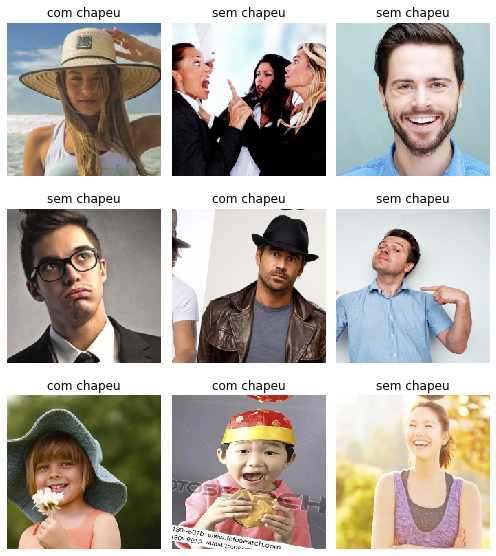

In [4]:
data.classes
data.show_batch(rows=3, figsize=(7,8))

In [5]:
data

ImageDataBunch;

Train: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
com chapeu,com chapeu,com chapeu,com chapeu,com chapeu
Path: E:\OneDrive\Doutorado\Cursos\FastAI_Pierre\Aula02-30out2019\Atividade\downloads;

Valid: LabelList (28 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sem chapeu,sem chapeu,com chapeu,com chapeu,sem chapeu
Path: E:\OneDrive\Doutorado\Cursos\FastAI_Pierre\Aula02-30out2019\Atividade\downloads;

Test: None

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['com chapeu', 'sem chapeu'], 2, 113, 28)

## Model

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

## Carregando o modelo


In [8]:
learn.load('Stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
com chapeu,com chapeu,com chapeu,com chapeu,com chapeu
Path: E:\OneDrive\Doutorado\Cursos\FastAI_Pierre\Aula02-30out2019\Atividade\downloads;

Valid: LabelList (28 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sem chapeu,sem chapeu,com chapeu,com chapeu,sem chapeu
Path: E:\OneDrive\Doutorado\Cursos\FastAI_Pierre\Aula02-30out2019\Atividade\downloads;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): B

## Agora é a 3ª e das 3 etapas principais, a interpretação do seu modelo.

In [9]:
interp = ClassificationInterpretation.from_learner(learn)


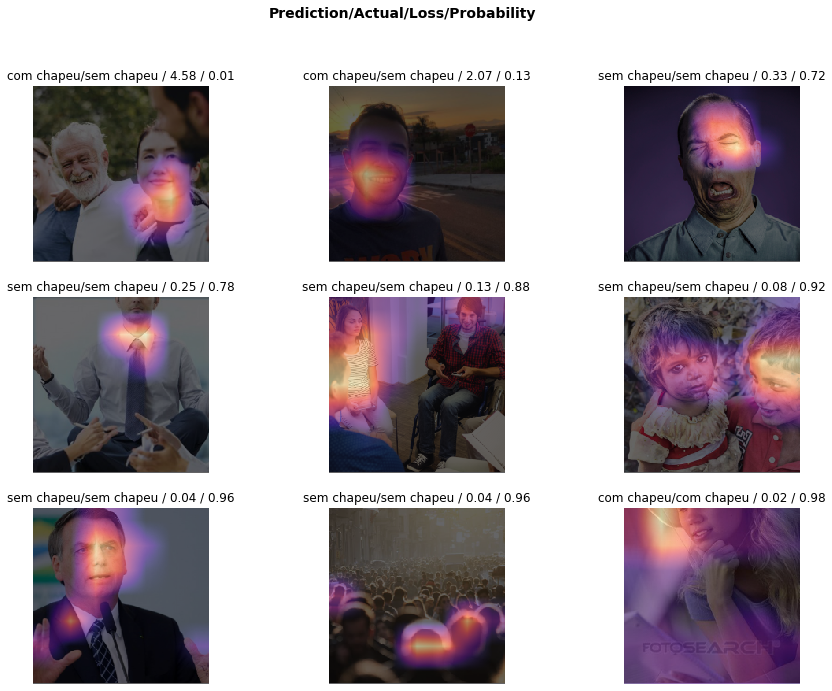

In [14]:
interp.plot_top_losses(9, figsize=(15,11),heatmap=True)

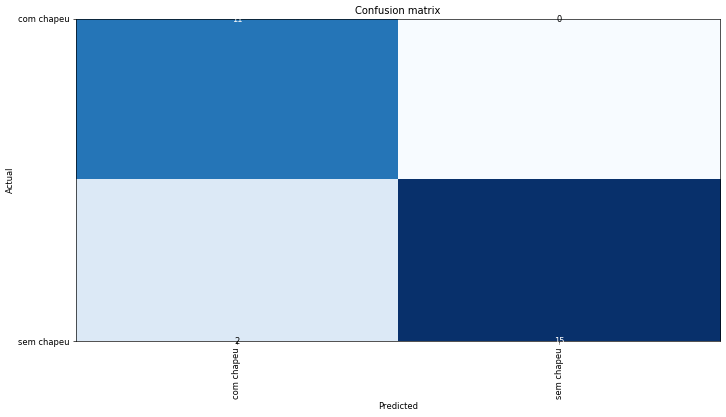

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [12]:
interp.most_confused(min_val=2)

[('sem chapeu', 'com chapeu', 2)]

## Retraining

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


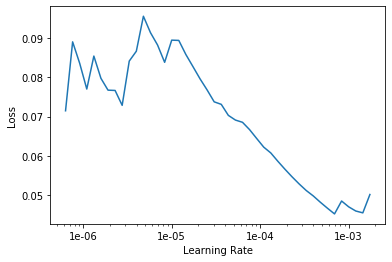

In [15]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [16]:
doc(ImageDataBunch)